In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

## Step-1:Data Processing.

### Load the dataset

In [2]:
# load the dataset
boston=load_boston()
#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# put the data into pandas dataframe
features=pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
# for selecting single column
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [5]:
target=pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
max(target['target'])

50.0

In [7]:
min(target['target'])

5.0

In [8]:
#concatenate features and target into a single dataframe
#axis=1 makes it concatenate columnwise

df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Visualization

In [10]:
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Correlation between Target and Attributes
### Correlation is a statistical technique that can show whether and how strongly pairs of variables are related
### DataFrame.corr(method = 'peardon')
### Compute pairwise correlation of co;umns, excluding NA/null values.
### Method : {'pearson','kendall','spearman'} or callable
  ### pearson : standard correlation coefficient.
  ### kendall : kendall Tau correlation cofficient
  ### spearman : Spearman rank correlation.
  ### callable : callable with input two 1d array

In [11]:
corr = df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### List comprehension is a syntactic construct that allows us to build a list.
#### Using a list comperhension is an alternative to building lists instead of creating an empty list and appending elements to it.

#### it also results in shorter code that is easier to read.

#### Example: arr = list()

#### for i in range(5):

#### arr.append(i)

#### is equivalent to

      arr = [i for in range(5)]

In [12]:
# Take absolute values of correlatons
corrs = [abs(corr[attr]['target']) for attr in list(features)]

In [13]:
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

#### Syntax:

#### zip(*iterators)

#### Parameters : Python iterables or containers(list,string etc) Return value: Returns a single iterator object, having mapped values from all the containers.

In [14]:
# make a list of pairs [(corr, feature)]
l = list(zip(corrs, list(features)))

In [15]:
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

#### Lambda Function:

#### A lambda function is a short funstion that has no name i.e it is an anonymous function. It is generally used to perfrom a small operation.

#### Lambda function instead of defining a separate function that will be used only once.
#### Eaxmple:

#### arr = [(9,'b'),(1,'x'),(2,'b')]

#### Sort arr without the use of a lambda function

#### def key(pair):

 ####  return pair[0]
#### sort(arr,key=key) Sort arr by using a lambda function to cjoose the key sort(arr,key= lambda pair:pair[0])

In [16]:
# sort the list of pairs in reverse/descending order,
# with the correlation value as the key for sorting
l.sort(key = lambda x: x[0], reverse =True)

In [17]:
l

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

#### zip is an inbuilt function in python that allows to combine multiple lists.When we have multiple lists and we want to group the elements at the same position, we use the zip function.
#### Example:

#### a = [1,2,3] b = ['a','b','c'] c = [100,300,300]

#### arr = list(zip(a,b,c))

#### now arr is constructed as follows

#### [(1,'a',100),(2,'b',300),(3,'c',300)]

In [18]:
# Unzip pairs to two lists
# zip(*l) - takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]]
# and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs, labels = list(zip((*l)))

#### matplotlib.pyplot.bar(x,height,width=0.8,bottom=None,align = 'Center')

#### Make a bar plot. x:sequance of scalars. The x coordinates of the bars.
#### height: scalar or array-like, optional. The width(s) of the bars(defaults:0.8).

#### width: scalar or array-like, optional.The width(s) of the bars (default:0.8).

#### bottom: scalar or array-like,optional

#### The y coordinates(s) of the bars bases (default:0)

#### align:{'center','edge'},optional,default:'center'

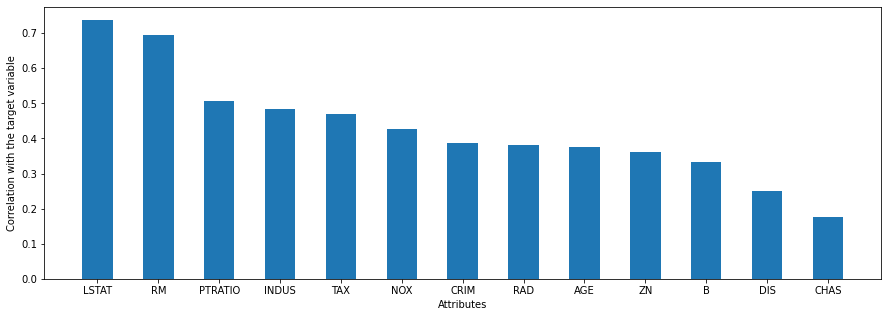

In [19]:
# plots correlation with repect to the target variable as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index, labels)
plt.show()

#### We observe from the bar graph generated above, that LSTAT and RM have the two highest absolute correlation values

### Normalize the data

#### Normalize the data with MinMaxScaler

In [20]:
X = df['LSTAT'].values
Y = df['target'].values

In [21]:
# Before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [22]:
x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]

In [23]:
y_scaler =MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[:,-1]

In [24]:
# After normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


## Loss function
#### Method to evaluate how well our model fits the dataset
#### Difference between Predicated Value and Actual Value
#### Bad model - Higher Value of Loss function
#### Good model - Lower Value of Loss Function
#### Change in the Loss Function determines whether the model is improving or not
### Types of Loss Functions
#### Mean Sqaure Error
#### Mean Absolute Error
#### Cross Entropy Loss
## Step 2 :Define error
### Mean Square Error
#### Average of Squared Difference between Predictions and Actual Values
#### Average Magintude of Error irrespective of direction
#### Highly incorrect prediction penalized heavily
#### Easier to calculate gradients
 $$\begin{equation*}
MSE = \frac{1}{n}\sum_{i=1}^n(Y-Y_i)^2
\end{equation*}$$


### Purpose:
#### To compute the Mean Squares error
#### error_value = (1/n)*sum(np.power(target_value - predictedvalue.2)) ##### Using the library function from sklearn mean_squared_error(target_values,predicted_values)
#### Using numpy, we can make use of the vectorized operations
#### We can also use the library function, the output will be the same
#### Parameters:
#### Target values
#### Predicted values
#### Return:
#### The Mean Squared Error Value
#### Mean Absolute Error
#### Average of Sum of Absolute Difference between Predictions and Actual Values
#### Measures Magintude of Error without considering direction
#### More Robust to Outliers
$$\begin{equation*}
MAE = \frac{1}{n}\sum_{i=1}^n|Y-Y_i|
\end{equation*}$$
### Cross Entropy Loss
#### Measure performance of Classification Model
#### Increase as Predicated probability diverges from actual value \begin{equation} CEL = -(Y log(Y_i) + (1-Y) log(1-Y_i)) \end{equation}

In [25]:
def error(m,x,c,t):
    N = x.size
    e = sum(((m*x+c)-t)**2)
    return e*1/(2*N)

### Splitting the Data
#### Training Dataset
####  Sample of data used for learning
####  Create a model that fits the data
####  Validation Dataset
####  Sample of data used to evaluate a model fit and tune the model, if necessary
####  Model "sees" the data, but does not "learn" from it
#### Test Dataset
####  Sample of the data to evaluate the final model fit
####  Unabaised evaluation, unlike in the case of validation dataset
### Overfit vs Underfit
#### Overfitting -> Model that fits the data "too well"
#### Underfitting -> Model that does not capture the trend

In [26]:
import matplotlib.image as image
import matplotlib.pyplot as plt

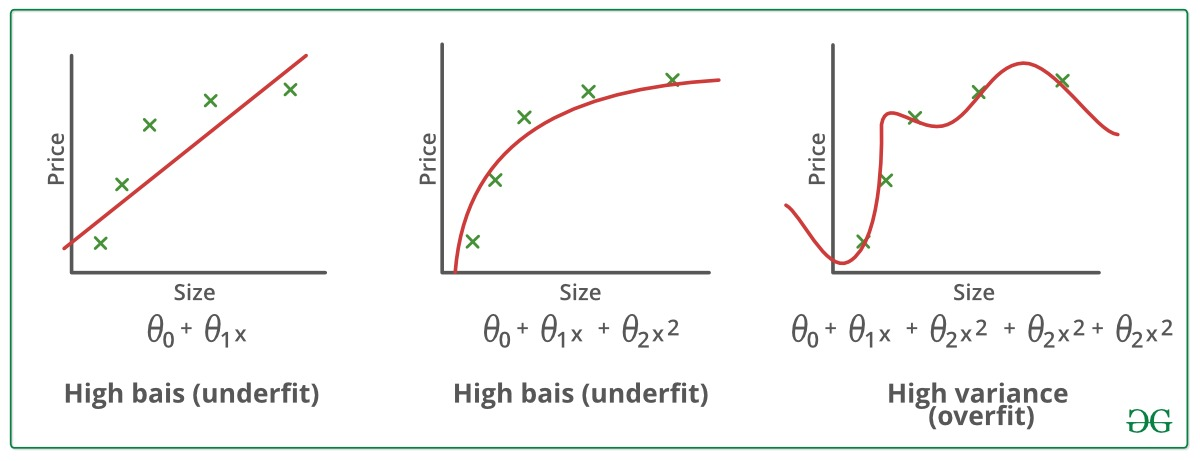

In [27]:
from IPython.display import Image
Image(filename="abcd.jpeg")

### Split the data:
#### Split the data into training and testing data: The data is split before the training step and the samples in the sets of data do not change during the course of the trainig process
#### Cross Validation: Split the data into equal chucks. At each step of training, choose one shunk of data as training data and other chunks as testing data.
#### We will use cross validation as itis out of the scope of this lesson. It will be presented in a future lesson

### Splitting data into fixed sets¶

In [28]:
# 0.2 indicating 20% of the data is randomly sampled ad testing data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

## Linear Regression
#### Origin in Statistics
#### Understand relationship between input and output numerical variables
#### Supervised Learing
#### Predicted output is continuous rather than dicrete(like classificaton)
#### Linear Model - Assumes a linear relationship between the input variables and the single output variables
#### Target/Label - Linear Combination of features
#### Hypothesis:
         Y = m * X + c


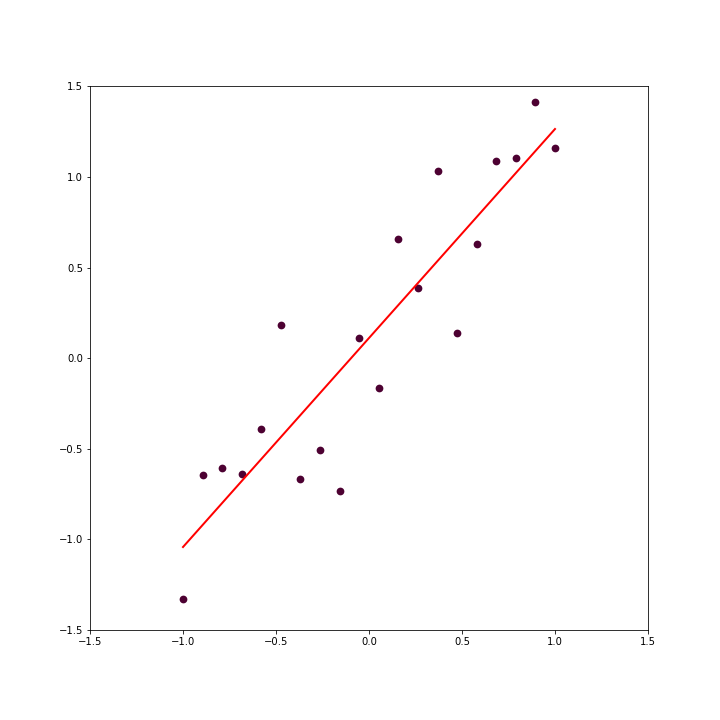

In [29]:
from IPython.display import Image
Image(filename="linear-weak.png")

## Types
### Simple Regression
#### Target/Label is dependent on a single feature
#### Y = m * X +c
### Multivariable Regression
#### Target/Label is dependent on multiple feature $f(x,y,z) =  w_1 * x + w_2 * y + w_3 *z+b $
## Learning in Linear Regression:
#### Assume an initial slope & Intercept --> Calculate Error using Least Squares --> Apply Optimization Techniques --> Obtain best Possible Line that Fits the Data
#### Gradient Descent
#### Optimization Algorithm to minimize a functon
#### Iteratively move in the direction of steepest descent
### Steepest descent:
#### Largest Negative Gradient
#### Learning Rate - Size of the iterative step
#### Too Low - Requries many steps although accurate
#### Too High - Might lead to Divergence
### Cost Function - The function to be minimized in ML problems


### Gradient Descent in Linear Regression
--> Start with an initial Assumption for m & c --> Calculate Cost Function
--> Calculate Gradient at Current Position --> Determine Direction to Move
--> Update m & c based on Learning Rate

- Model Hypothesis--> Linear fit
\begin{equation*}
Y = m * X_i +c
\end{equation*}
- Cost Function --> Mean Squared Error
\begin{equation*}
MSE = \frac{1}{n}\sum_{i=1}^n|Y-Y_i|^2
\end{equation*}

- Apply Gradient Descent to
\begin{equation*}
f(m,c) = \frac{1}{n}\sum_{i=1}^n((m*X_i+c)-Y_i)^2
\end{equation*}
- Gradient Calculation
\begin{equation*}
f'(m,c) =  \begin{vmatrix}
\frac{\partial f}{\partial m} \\
\frac{\partial f}{\partial c}
\end{vmatrix}
= \begin{vmatrix}
\frac{\Delta m}{\Delta c}
\end{vmatrix}
= \begin{vmatrix}
\frac{1}{n}\sum_{i=1}^n2*X_i*((m + X_i + c)-Y_i)\\
\frac{1}{n}\sum_{i=1}^n2*((m + X_i + c)-Y_i)
\end{vmatrix}
\end{equation*}

### Gradient Descent - Programming Logic
#### 1. Update Function
### Purpose
#### Calculate Gradient at Current Position
#### Update Values of m & c
#### Parameters
#### Current Values of m & c
#### Attributes Values(x)
#### Target Values(t)
#### Learning Rate
### Return
#### Return the error value #### 3. Gradient Desecent Function
#### Purpose
#### Apply Gradient Descent on the Cost Function
#### Obtain the best fit values for m & c
#### Parameters
#### Initial Values of m & c
#### Attributes Values(x)
#### Target Values(t)
#### Learning Rate
#### NUmber of iterations
#### Error Thershold
#### Return
#### Final Values of m & c, lists of all intermittent error, m & c values

### Update Function
#### Equation to update weights
\begin{equation*}
gradient_m = \sum_{k=1}^n(2*((mx_k)+c)-t_k)*x_k*learning_ rate
\end{equation*}
\begin{equation*}
gradient_c = \sum_{k=1}^n(2*((mx_k+c)-t_k)*learning_ rate)
\end{equation*}
\begin{equation*}
m = m - gradient_m
\end{equation*}
\begin{equation*}
c = c -gradient_c
\end{equation*}

In [30]:
def update(m,x,c,t, learning_rate):
    grad_m = sum(2*((m * x + c)-t) * x)
    grad_c = sum(2*((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

## Error Threshold :
### If the error falls below the threshold, the gradient descent process is stopped and the weights are returned

In [31]:
def gradient_descent(init_m, init_c , x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print("Error less than the threshold. Stopping gradirnt descent")
            break
        error_values.append(e)
        m ,c = update(m, x, c, t, learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

## The parameters may be changed to varied to obseve the computation vs accuracy trade-offs.
* $Learning$ $Rate$ : Increasing the learning rate reduces the convergence time.But, if the learning rate is too high model will overshoot the minima.
* $Iterations$ : Numbers of iterations must be large enough to allow the model to converge to a minima , but if it is too large, then the model becomes too specific to the training data thus causing overfitting,i.e, the model "memorize" the data instead of "learning" the data.
* $ Error threashold$ : This value can be set to a maximum value of error that is acceptable. When the error value goes below the threshold, the gradient is stopped.
* $ Initial values$ : For this problem where our objective is to determine the line which gives the least error, it does not matter what initial values you provides. But, for non-convex optimization problems, initial values affect the learning process. We will elborate on this when we learn neural networks.

In [32]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001


m, c, error_values, mc_values= gradient_descent(init_m, init_c, x_train, y_train, learning_rate, iterations, error_threshold)

Wall time: 152 ms


### Training the Model
#### * Visualization of Model Training
#### * Animation make take a minute or more to get processed.
##### Therefore select every 5th value (or a larger interval if you wish) to reduce the processing time

In [33]:
# As the number of iteration increases, changes in the line are less noticable.
# Inorder to reduce the processing time for the animation, it is adivsed to choose small values
mc_values_anim = mc_values[0:250:5]

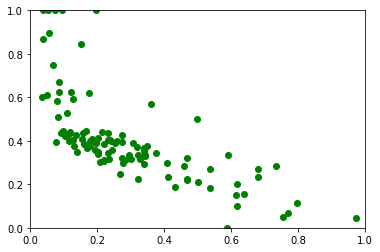

In [34]:
fig, ax= plt.subplots()
ln, = plt.plot([],[],'ro-',animated = True)

def init():
    plt.scatter(x_test,y_test,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,
def update_frame(frame):
    m,c = mc_values_anim[frame]
    x1,y1 = -0.5,m * -.5 + c
    x2,y2 = 1.5, m * 1.5 +c
    ln.set_data([x1,x2],[y1.y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames = range(len(mc_values_anim)),
                    init_func = init, blit = True)
#HTML(anim.to_html5_video())

### Visualization of Error Values
### Visualization of the learning process
#### 1.Plot the regression line against the training data set to visualize what the line looks like for the training data set
#### 2.Plot the error values: This graph will show you how the error drops over time
#### 3.Plot the changes in regression line throught the training process: This graph helps you visualize how m and c values are update after each step

### Plotting the regression line upon the training data set

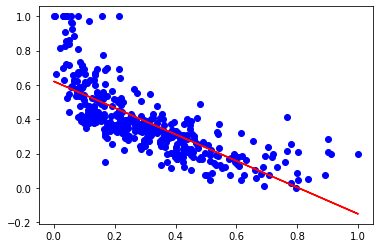

In [35]:
plt.scatter(x_train,y_train,color='b')
plt.plot(x_train,(m*x_train + c), color='r')

### Plotting Error Values

Text(0.5, 0, 'Iterations')

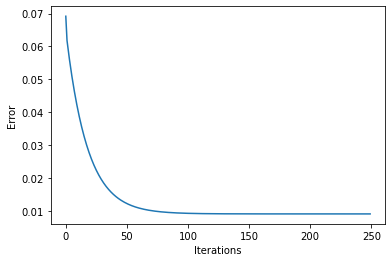

In [36]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iterations')

## Prediction of House Prices
### Prediction - The steps
#### 1.Compute the predicted values for each x values using the line equation with the m and c values learned from gradient descent.
#### 2.Reshape predicted, x_test, and y_test arrays from a row to a column
#### 3.Scale the predicted,x_test and y_test arrays and store then as predicted_scaled, x_test_scaled and y_test_scaled
#### 4.Scaling adds an extra dimension to each of the arrays. Therefor remove it with a scaling operation.
## Code for the steps
#### predicted = (m*x_test) + c predicted = predicted.reshape(-1,1) x_test = x_test.reshape(-1,1) y_test = y_test.reshape(-1,1) x_test_scaled = x_scaler.inverse_transform(x_test) y_test_scaled = y_scaler.inverse_transform(y_test) predicted_scaled = y_scaler.inverse_transform(predicted) x_test_scaled = x_test_scaled[:,-1] y_test_scaled = y_test_scaled[:,-1] predicted_scaled = predicted_scaled[:,-1]
### Prediction of Prices
#### Evalute Target and Predicted values
#### Step 5: Prediction
#### After step 4, we obtain the final values of m and c. Using these values we obtain the predictions for the values in the testing data

#### We will then evaluate the model with certain metrics such as RMSE, R2 score etc. The choice of these metrics will depend on the type of data.(Categorical,continuous etc)



## Prediction

In [37]:
# Calcualte the predictions on the test set as a vectorized operation
predicted = (m * x_test) + c

In [38]:
# Compute MSE for the predicted values on the testing set
mean_squared_error(y_test, predicted)

0.022058480605116882

In [39]:
# Put x_test, y_test and predicted values into a single DataFrame so that we
# can see the predicted values a longside the testing set

p = pd.DataFrame(list(zip(x_test, y_test, predicted)), columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.049669,0.608889,0.582504
1,0.075055,1.000000,0.562898
2,0.433499,0.186667,0.286070
3,0.241998,0.400000,0.433967
4,0.343819,0.331111,0.355330


### Plot the predicted values against the target values
#### 1.Predicted values are represented by the red colored line
#### 2.Target values are represented by blue colored points

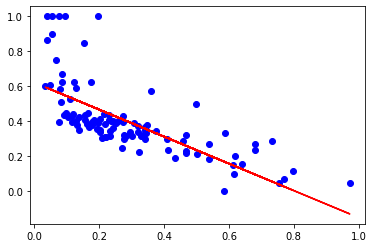

In [40]:
plt.scatter(x_test, y_test, color='b')
plt.plot(x_test, predicted, color = 'r')

#### The predicted values are in the range 0-1. This is not very useful to us when we want to obtain the price.

#### Use inverse_tranform() to scale the values back to original representation

In [41]:
# Reshape to change the shape that is required by the scaler
predicted = predicted.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

x_test_scaled = x_scaler.inverse_transform(x_test)
y_test_scaled = y_scaler.inverse_transform(y_test)
predicted_scaled = y_scaler.inverse_transform(predicted)

# This is to remove the extra dimension
x_test_scaled = x_test_scaled[:,-1]
y_test_scaled = y_test_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(x_test_scaled,y_test_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p = p.round(decimals= 2)
p.head()


,x,target_y,predicted_y
0,3.53,32.4,31.21
1,4.45,50.0,30.33
2,17.44,13.4,17.87
3,10.50,23.0,24.53
4,14.19,19.9,20.99
